**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month', date_parser=dateparse)
df.head()

<ipython-input-2-88163272a03f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


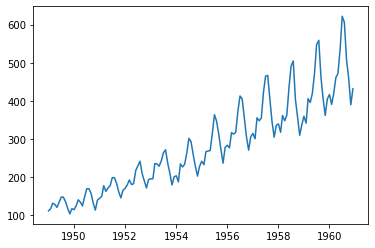

In [3]:
ts = df['#Passengers']
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='MS')
ts = pd.Series(ts.values, index)
plt.plot(ts)
plt.show()

In [4]:
from pyts.datasets import make_cylinder_bell_funnel

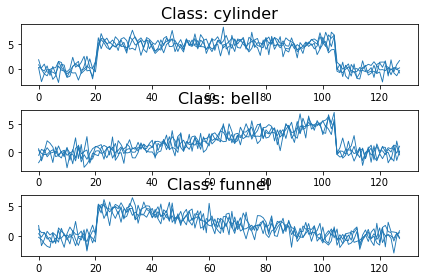

In [5]:
X, y = make_cylinder_bell_funnel(n_samples=12, random_state=42)

plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [6]:
X.shape

(12, 128)

# Shapelet Discovery

https://tslearn.readthedocs.io/en/latest/gen_modules/shapelets/tslearn.shapelets.ShapeletModel.html#tslearn.shapelets.ShapeletModel

https://www.kaggle.com/group16/shapelets

In [7]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [8]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 12
ts_sz 128
n_classes 3
shapelet_sizes {12: 3}


In [9]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [10]:
shp_clf.fit(X, y)

Epoch 1/200
1/1 [==============================] - 0s 406ms/step - loss: 1.3547 - categorical_accuracy: 0.2500 - categorical_crossentropy: 1.3346
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 1.3411 - categorical_accuracy: 0.2500 - categorical_crossentropy: 1.3211
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 1.3282 - categorical_accuracy: 0.2500 - categorical_crossentropy: 1.3082
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 1.3159 - categorical_accuracy: 0.2500 - categorical_crossentropy: 1.2960
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 1.3041 - categorical_accuracy: 0.2500 - categorical_crossentropy: 1.2844
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2930 - categorical_accuracy: 0.2500 - categorical_crossentropy: 1.2733
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 1.2824 - categorical_accuracy: 0.2500 - categorical_crossentrop

1/1 [==============================] - 0s 3ms/step - loss: 1.0362 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0194
Epoch 58/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0334 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0166
Epoch 59/200
1/1 [==============================] - 0s 2ms/step - loss: 1.0307 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0139
Epoch 60/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0280 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0112
Epoch 61/200
1/1 [==============================] - 0s 3ms/step - loss: 1.0253 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0085
Epoch 62/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0226 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.0059
Epoch 63/200
1/1 [==============================] - 0s 2ms/step - loss: 1.0200 - categorical_accuracy: 0.4167 - categorical_crossentropy: 1.003

1/1 [==============================] - 0s 2ms/step - loss: 0.9154 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.9001
Epoch 114/200
1/1 [==============================] - 0s 2ms/step - loss: 0.9137 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.8985
Epoch 115/200
1/1 [==============================] - 0s 3ms/step - loss: 0.9120 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.8968
Epoch 116/200
1/1 [==============================] - 0s 3ms/step - loss: 0.9104 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.8952
Epoch 117/200
1/1 [==============================] - 0s 2ms/step - loss: 0.9088 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.8936
Epoch 118/200
1/1 [==============================] - 0s 2ms/step - loss: 0.9071 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.8920
Epoch 119/200
1/1 [==============================] - 0s 2ms/step - loss: 0.9055 - categorical_accuracy: 0.4167 - categorical_crossentropy:

1/1 [==============================] - 0s 2ms/step - loss: 0.8405 - categorical_accuracy: 0.4167 - categorical_crossentropy: 0.8259
Epoch 169/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8394 - categorical_accuracy: 0.5000 - categorical_crossentropy: 0.8248
Epoch 170/200
1/1 [==============================] - 0s 2ms/step - loss: 0.8383 - categorical_accuracy: 0.5000 - categorical_crossentropy: 0.8238
Epoch 171/200
1/1 [==============================] - 0s 4ms/step - loss: 0.8372 - categorical_accuracy: 0.5000 - categorical_crossentropy: 0.8227
Epoch 172/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8361 - categorical_accuracy: 0.5000 - categorical_crossentropy: 0.8216
Epoch 173/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8351 - categorical_accuracy: 0.5000 - categorical_crossentropy: 0.8206
Epoch 174/200
1/1 [==============================] - 0s 3ms/step - loss: 0.8340 - categorical_accuracy: 0.5000 - categorical_crossentropy:

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 3}, verbose=1,
                  weight_regularizer=0.01)

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

1/1 [==============================] - 0s 83ms/step
Correct classification rate: 0.5833333333333334


In [13]:
predicted_locations = shp_clf.locate(X)

1/1 [==============================] - 0s 56ms/step


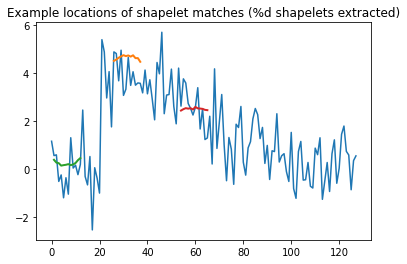

In [14]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

## Shaplet Discovery 2 (not tested in 2021)

In [ ]:
from shapelets_lts.classification import LtsShapeletClassifier

https://github.com/mohaseeb/shaplets-python

In [37]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=1,
    L_min=10,
    epocs=10,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)
"""
:param K: number of shapelets
:param R: scales of shapelet lengths
:param L_min: minimum shapelet length
"""

'\n:param K: number of shapelets\n:param R: scales of shapelet lengths\n:param L_min: minimum shapelet length\n'

In [38]:
shp_clf.fit(X, y)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/10 (iteration=12) loss=9.152756415388325 validation accuracy=0.3333333333333333
epoch=2/10 (iteration=24) loss=7.626020734091692 validation accuracy=0.3333333333333333
epoch=3/10 (iteration=36) loss=6.158452427453218 validation accuracy=0.3333333333333333
epoch=4/10 (iteration=48) loss=4.889924400542668 validation accuracy=0.3333333333333333
epoch=5/10 (iteration=60) loss=3.91293624679182 validation accuracy=0.3333333333333333
epoch=6/10 (iteration=72) loss=3.1993049403197 validation accuracy=0.3333333333333333
epoch=7/10 (iteration=84) loss=2.678257054709934 validation accuracy=0.4166666666666667
epoch=8/10 (iteration=96) loss=2.294665774902248 validation accuracy=0.5833333333333334
epoch=9/10 (iteration=108) loss=2.0123220214786017 validation accuracy=0.5
epoch=10/10 (iteration=120) loss=1.8056448317909788 validation accuracy=0.8333333333333334


LtsShapeletClassifier(K=10, L_min=10, R=1, alpha=-100, epocs=10, eta=0.01,
                      lamda=0.01, plot_loss=False,
                      shapelet_initialization='segments_centroids')

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

Correct classification rate: 0.8333333333333334


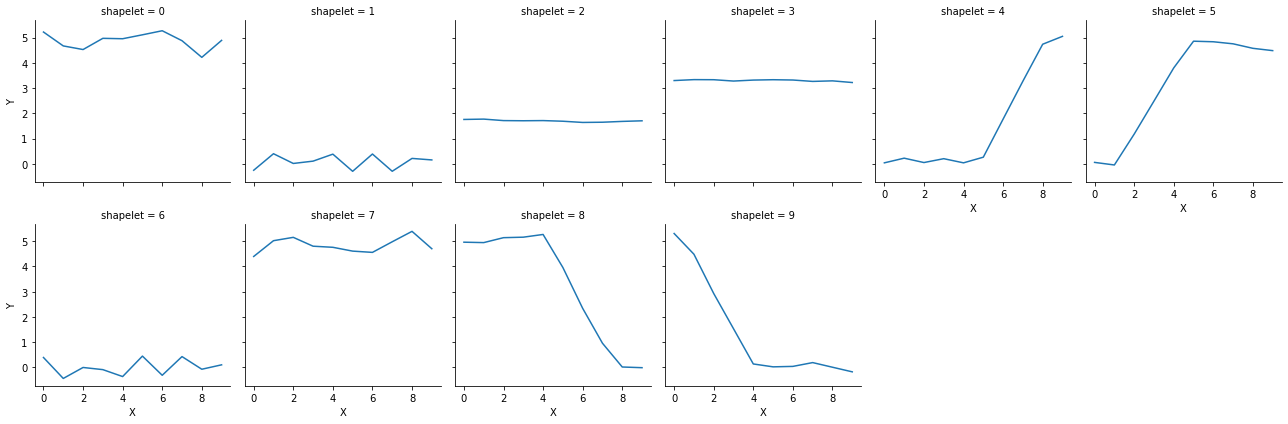

In [41]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [42]:
len(shapelets)

10

In [43]:
shapelets

[array([ 5.30688672,  4.48622996,  2.92931323,  1.53495141,  0.13825961,
         0.02437946,  0.04213028,  0.19267785,  0.00933868, -0.17356646]),
 array([3.30033463, 3.33717607, 3.33370569, 3.28043424, 3.31914683,
        3.3336663 , 3.32147155, 3.26639205, 3.28842798, 3.22218183]),
 array([ 0.39479182, -0.43532758, -0.00070383, -0.08617   , -0.36042237,
         0.44998108, -0.30976629,  0.43028597, -0.0705207 ,  0.10406495]),
 array([-0.25350549,  0.40147858,  0.01583167,  0.1078209 ,  0.38454466,
        -0.29530212,  0.38979547, -0.29360741,  0.21567599,  0.15584628]),
 array([0.04037442, 0.22529334, 0.05177193, 0.20477346, 0.04011229,
        0.2645971 , 1.77277756, 3.27620945, 4.73943695, 5.05160013]),
 array([1.75917591, 1.77289433, 1.71409217, 1.70755197, 1.71429359,
        1.68874537, 1.6407982 , 1.64933602, 1.68206062, 1.7056097 ]),
 array([5.22300204, 4.67256599, 4.52904822, 4.97326313, 4.95715592,
        5.11281917, 5.27357678, 4.87899674, 4.2196563 , 4.89213715]),
 arr

## Shaplet Discovery 3

In [16]:
from pyts.transformation import ShapeletTransform

https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html#pyts.transformation.ShapeletTransform

In [18]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[8])
st.fit(X, y)

ShapeletTransform(n_shapelets=3, window_sizes=[8])

In [19]:
len(st.shapelets_)

3

In [20]:
st.shapelets_

array([[3.16374059, 4.28167516, 1.31811493, 1.60277031, 2.19599592,
        1.77094864, 1.71521399, 0.37938582],
       [2.12458586, 1.04881421, 4.03993485, 1.47077309, 1.83434633,
        0.96106691, 3.45142688, 3.41783292],
       [2.86576409, 1.48091371, 2.01424056, 2.98288456, 3.77972651,
        3.55721448, 2.73224035, 2.22168346]])

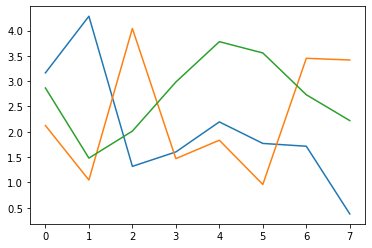

In [21]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

The indices for the corresponding shapelets in the training set. The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets.

In [22]:
st.indices_

array([[ 2, 55, 63],
       [ 2, 71, 79],
       [ 5, 60, 68]])

In [23]:
X[2][55:63]

array([3.16374059, 4.28167516, 1.31811493, 1.60277031, 2.19599592,
       1.77094864, 1.71521399, 0.37938582])

In [24]:
st.scores_

array([0.74487734, 0.74662999, 0.76154401])

## Shaplet Discovery 4

In [25]:
from pyts.classification import LearningShapelets

https://pyts.readthedocs.io/en/stable/generated/pyts.classification.LearningShapelets.html#pyts.classification.LearningShapelets

In [26]:
shp_clf = LearningShapelets(random_state=42, tol=0.01)

In [27]:
shp_clf.fit(X, y)

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2], y=[2 0 2 0 1 1 2 0 1 0 2 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


LearningShapelets(random_state=42, tol=0.01)

In [28]:
len(shp_clf.shapelets_[0])

78

In [29]:
from pyts.utils import windowed_view

In [30]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

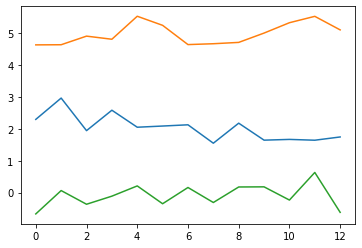

In [31]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [32]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

In [33]:
X_dist

array([[0.63025999, 1.80339056, 0.6204713 ],
       [3.25704989, 0.26575527, 0.61552347],
       [0.66522778, 0.50255423, 0.34454622],
       [4.37417861, 0.32375324, 0.57050332],
       [0.60377677, 0.42532979, 0.44311775],
       [0.83701991, 1.05561249, 0.80870552],
       [0.69013442, 0.65093035, 0.32309354],
       [3.83861951, 0.42815121, 0.30358362],
       [0.67085208, 0.49202648, 0.5242815 ],
       [4.4161073 , 0.55854693, 0.5999576 ],
       [0.49508949, 1.09992379, 0.72275421],
       [1.39913071, 1.50156939, 0.39416505]])

In [34]:
np.mean(X_dist[y == 0], axis=0)

array([3.97148883, 0.39405166, 0.522392  ])

In [35]:
np.mean(X_dist[y == 1], axis=0)

array([0.87769487, 0.86863454, 0.54256746])

In [36]:
np.mean(X_dist[y == 2], axis=0)

array([0.62017792, 1.01419973, 0.50271632])

# Matrix Profile

https://github.com/target/matrixprofile-ts

https://github.com/TDAmeritrade/stumpy

In [37]:
from matrixprofile import *

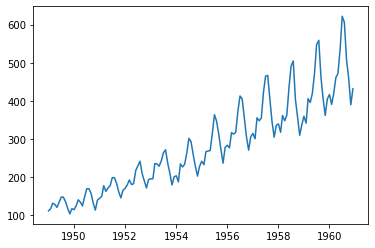

In [38]:
plt.plot(ts)
plt.show()

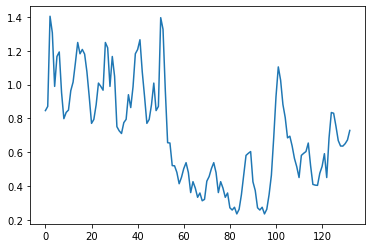

In [39]:
w = 12
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

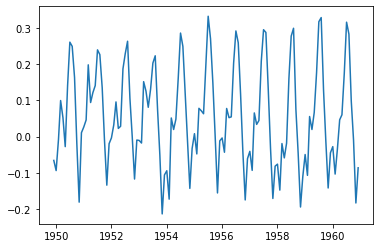

In [40]:
window = 12
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.show()

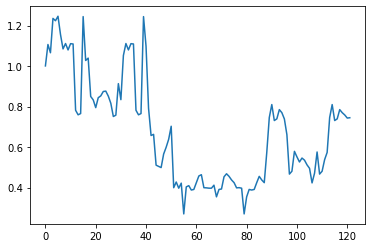

In [41]:
w = 12
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

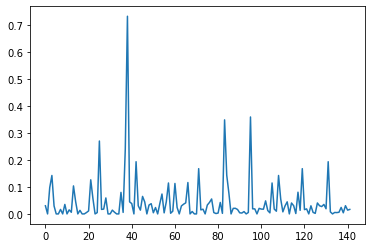

In [42]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [43]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [44]:
mo

[[1, 10], [5, 29, 47], [34, 113], [52, 133]]

In [45]:
mod

[2.220446049250313e-16,
 2.220446049250313e-16,
 2.220446049250313e-16,
 2.220446049250313e-16]

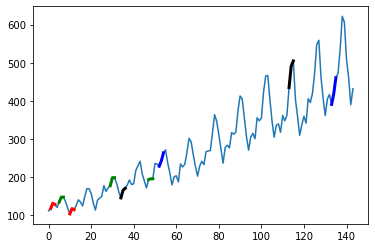

In [46]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

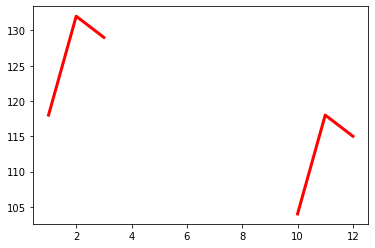

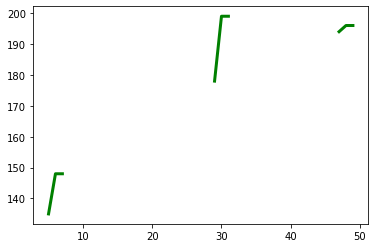

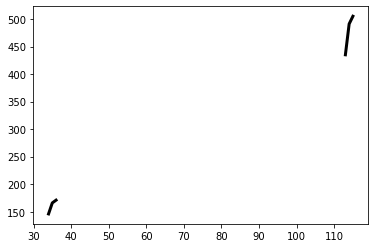

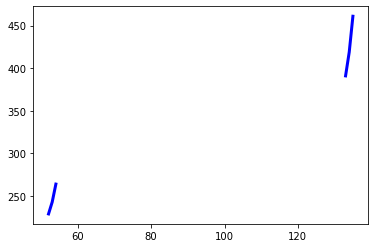

In [47]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# Anomaly Discovery

In [48]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [49]:
anoms = discords(mp, ex_zone=3, k=5)

In [50]:
anoms

array([38, 95, 83, 25, 42])

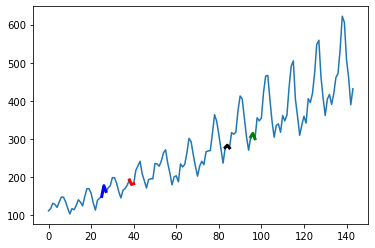

In [51]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

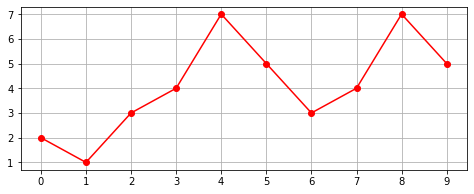

In [52]:
plt.figure(figsize=(8, 3))
x = np.array([2,1,3,4,7,5,3,4,7,5])
plt.plot(range(len(x)), x, marker='o', color='r')
plt.xticks(range(len(x)))
plt.grid()
plt.show()

In [53]:
w = 3
mp = np.array([np.inf] * (len(x) - w + 1))
for i in range(len(x) - w + 1):
    print('a', x[i:i+w])
    for j in range(len(x) - w + 1):
        if i == j:
            continue
        print('b', x[j:j+w])
        val = 0
        for k in range(w):
            val += np.abs(x[i + k] - x[j + k])
        print(val)
        mp[i] = min(mp[i], val)
    print('')
        

a [2 1 3]
b [1 3 4]
4
b [3 4 7]
8
b [4 7 5]
10
b [7 5 3]
9
b [5 3 4]
6
b [3 4 7]
8
b [4 7 5]
10

a [1 3 4]
b [2 1 3]
4
b [3 4 7]
6
b [4 7 5]
8
b [7 5 3]
9
b [5 3 4]
4
b [3 4 7]
6
b [4 7 5]
8

a [3 4 7]
b [2 1 3]
8
b [1 3 4]
6
b [4 7 5]
6
b [7 5 3]
9
b [5 3 4]
6
b [3 4 7]
0
b [4 7 5]
6

a [4 7 5]
b [2 1 3]
10
b [1 3 4]
8
b [3 4 7]
6
b [7 5 3]
7
b [5 3 4]
6
b [3 4 7]
6
b [4 7 5]
0

a [7 5 3]
b [2 1 3]
9
b [1 3 4]
9
b [3 4 7]
9
b [4 7 5]
7
b [5 3 4]
5
b [3 4 7]
9
b [4 7 5]
7

a [5 3 4]
b [2 1 3]
6
b [1 3 4]
4
b [3 4 7]
6
b [4 7 5]
6
b [7 5 3]
5
b [3 4 7]
6
b [4 7 5]
6

a [3 4 7]
b [2 1 3]
8
b [1 3 4]
6
b [3 4 7]
0
b [4 7 5]
6
b [7 5 3]
9
b [5 3 4]
6
b [4 7 5]
6

a [4 7 5]
b [2 1 3]
10
b [1 3 4]
8
b [3 4 7]
6
b [4 7 5]
0
b [7 5 3]
7
b [5 3 4]
6
b [3 4 7]
6



In [54]:
mp

array([4., 4., 0., 0., 5., 4., 0., 0.])

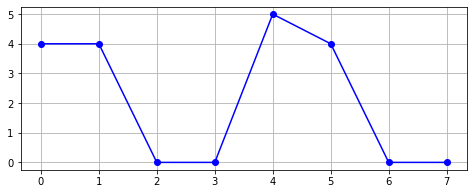

In [55]:
plt.figure(figsize=(8, 3))
plt.plot(mp, marker='o', color='b')
plt.xticks(range(len(mp)))
plt.grid()
plt.show()

In [56]:
from matrixprofile import *

In [57]:
mp, mpi = matrixProfile.naiveMP(np.random.rand(100), 4)

In [58]:
np.random.rand(20)

array([0.06010558, 0.04216274, 0.91238471, 0.30399328, 0.54223101,
       0.9000764 , 0.41389071, 0.00989994, 0.63565491, 0.20886986,
       0.27209612, 0.48224957, 0.24428378, 0.23996793, 0.27268713,
       0.32059154, 0.63833383, 0.88680944, 0.01715553, 0.29100977])

In [59]:
mp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

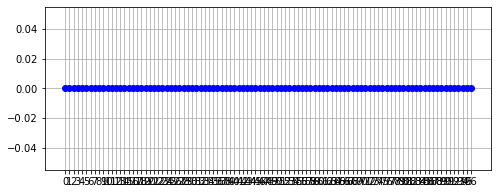

In [60]:
plt.figure(figsize=(8, 3))
plt.plot(mp, marker='o', color='b')
plt.xticks(range(len(mp)))
plt.grid()
plt.show()

In [61]:
mp

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
mpi

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96.])